In [29]:
# Pull the data into this Python session:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
GamesDF = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
GamesDF.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# First, I create a variable which contains the data frame where all rows with ANY (even one) missing value is dropped
GamesDF_Dropped_All = GamesDF.dropna()
GamesDF_Dropped_All

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


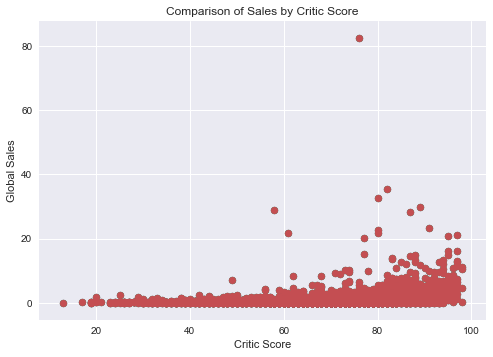

In [37]:
# Next, I will create a scatterplot to get a feel for how the data looks
plt.scatter(GamesDF_Dropped_All.Critic_Score, GamesDF_Dropped_All.Global_Sales)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales")
plt.title("Comparison of Sales by Critic Score")
plt.show()
# There appears to be a loose positive linear trend with this data

In [42]:
# Another thing to keep in mind is the release date
# A game release in 2006 has had 11 years to accumulate wealth, while a game release in 2015 had only 2 year to accumulate wealth
# For this reason, we will have a more accurate assesment if we compare the games that were released in the same year
# Let's start with 2006, since this year seems to be very intersting, due to the fact that many of the high selling games-
# (including Wii Sports, the game with the #1 highest sales) were released in 2006

GamesDF2006_Dropped_All = GamesDF_Dropped_All[GamesDF_Dropped_All.Year_of_Release == 2006]
GamesDF2006_Dropped_All

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
107,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.74,2.14,0.60,0.68,7.15,95.0,73.0,9,1658.0,Nintendo,T
142,Gears of War,X360,2006.0,Shooter,Microsoft Game Studios,3.54,1.88,0.07,0.60,6.09,94.0,88.0,8.3,2295.0,Epic Games,M
148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95,92.0,64.0,7.6,972.0,Square Enix,T
156,Cooking Mama,DS,2006.0,Simulation,505 Games,3.07,1.91,0.07,0.57,5.63,67.0,35.0,7.2,21.0,Taito Corporation,E
196,Guitar Hero II,PS2,2006.0,Misc,RedOctane,3.81,0.63,0.00,0.68,5.12,92.0,69.0,8.5,112.0,Harmonix Music Systems,T
204,Grand Theft Auto: Vice City Stories,PSP,2006.0,Action,Take-Two Interactive,1.70,1.99,0.16,1.18,5.03,86.0,50.0,8,150.0,Rockstar Leeds,M
241,Madden NFL 07,PS2,2006.0,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49,84.0,29.0,8.2,39.0,EA Sports,E


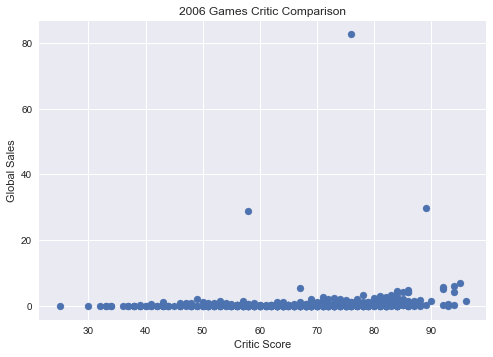

In [45]:
# Now, let's see what the plot looks like

plt.scatter(GamesDF2006_Dropped_All.Critic_Score, GamesDF2006_Dropped_All.Global_Sales)
plt.xlabel("Critic Score")
plt.ylabel("Global Sales")
plt.title("2006 Games Critic Comparison")
plt.show()

# There appears to be a slight positive linear trend
# However, the three outliers are very interesting
# These three games are "Wii Sports", "New Super Mario Bros.", and "Wii Play"
# Two of these games - "Wii Sports" and "Wii Play" - came bundled with the something else
# "Wii Sports" came included with the Wii Console and "Wii Play" came included with the purchase of an extra Wii Remote
# With this in mind, the sale of these games are directly parellel with the sale of wii consoles and - in some cases --
# extra Wii Remotes
# This is important for third party game developers/investors to be aware of, which is that game sales will increase -
# if they come bundled with a gaming console